In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로딩

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv")
data.head(30)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1
5,1,0.99,NaN,White,Galaxy_S7,contains description,0,0,1
6,1,150.00,NaN,White,Galaxy_S9,contains description,0,0,1
7,0,199.99,NaN,Midnight Black,Galaxy_S9,no description,92,0,1
8,0,99.99,NaN,White,Galaxy_S7,contains description,0,0,0
9,1,20.00,AT&T,Midnight Black,Galaxy_S7,no description,96,41,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


# 전처리

In [4]:
data.isna().sum() / len(data) * 100

BuyItNow                 0.000000
startprice               0.000000
carrier                 78.720539
color                   39.932660
productline              0.000000
noDescription            0.000000
charCountDescription     0.000000
upperCaseDescription     0.000000
sold                     0.000000
dtype: float64

In [5]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


In [6]:
data['carrier'].unique()

array([nan, 'AT&T', 'Sprint/T-Mobile', 'Verizon'], dtype=object)

In [7]:
data['carrier'].value_counts()

carrier
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: count, dtype: int64

In [8]:
data.groupby('carrier')['sold'].value_counts(sort=False)

carrier          sold
AT&T             0       101
                 1        76
Sprint/T-Mobile  0        28
                 1        24
Verizon          0        41
                 1        46
Name: count, dtype: int64

In [9]:
print("AT&T", 76 / (76+101))
print("Sprint/T-Mobile ", 24 / (24+28))
print("Verizon", 46 / (46+41))

AT&T 0.4293785310734463
Sprint/T-Mobile  0.46153846153846156
Verizon 0.5287356321839081


통신사는 판매에 큰 영향을 미치지 않는 것으로 판단되고 너무 많은 결측이 있어 삭제예정

In [10]:
data['color'].unique()

array(['White', nan, 'Space Gray', 'Midnight Black', 'Aura Black', 'Gold',
       'Black', 'Prism Black'], dtype=object)

In [11]:
data['color'].value_counts()

color
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

기종별로 색상 최빈값을 구해서 color nan값을 대치 

In [12]:
color_by_product = data.groupby('productline')['color'].value_counts()
color_by_product

productline    color         
Galaxy_Note10  Space Gray         91
               White              76
               Gold               46
               Aura Black         19
Galaxy_Note8   Midnight Black     58
               White              44
               Space Gray          2
               Gold                1
Galaxy_Note9   White              37
               Space Gray         27
               Black              10
Galaxy_S10     White               5
               Gold                1
               Prism Black         1
               Space Gray          1
Galaxy_S7      Midnight Black    111
               White              21
               Space Gray          3
Galaxy_S8      Midnight Black     59
               White              55
               Space Gray         38
Galaxy_S9      White              51
               Midnight Black     46
               Space Gray          1
Unknown        White              39
               Black              28
        

In [13]:
data.loc[data['productline'] == 'Galaxy_Note9', 'startprice'].describe() 

count    107.000000
mean     254.561402
std      126.208902
min        0.010000
25%      177.500000
50%      259.950000
75%      349.990000
max      575.000000
Name: startprice, dtype: float64

In [14]:
data.loc[(data['productline'] == 'Unknown') & (data['color'] == 'Black'), 'startprice'].describe() 

count     28.000000
mean     134.785714
std      134.173500
min        0.990000
25%       15.000000
50%       99.995000
75%      202.492500
max      473.600000
Name: startprice, dtype: float64

In [15]:
color_by_product

productline    color         
Galaxy_Note10  Space Gray         91
               White              76
               Gold               46
               Aura Black         19
Galaxy_Note8   Midnight Black     58
               White              44
               Space Gray          2
               Gold                1
Galaxy_Note9   White              37
               Space Gray         27
               Black              10
Galaxy_S10     White               5
               Gold                1
               Prism Black         1
               Space Gray          1
Galaxy_S7      Midnight Black    111
               White              21
               Space Gray          3
Galaxy_S8      Midnight Black     59
               White              55
               Space Gray         38
Galaxy_S9      White              51
               Midnight Black     46
               Space Gray          1
Unknown        White              39
               Black              28
        

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [17]:
color_by_product.index

MultiIndex([('Galaxy_Note10',     'Space Gray'),
            ('Galaxy_Note10',          'White'),
            ('Galaxy_Note10',           'Gold'),
            ('Galaxy_Note10',     'Aura Black'),
            ( 'Galaxy_Note8', 'Midnight Black'),
            ( 'Galaxy_Note8',          'White'),
            ( 'Galaxy_Note8',     'Space Gray'),
            ( 'Galaxy_Note8',           'Gold'),
            ( 'Galaxy_Note9',          'White'),
            ( 'Galaxy_Note9',     'Space Gray'),
            ( 'Galaxy_Note9',          'Black'),
            (   'Galaxy_S10',          'White'),
            (   'Galaxy_S10',           'Gold'),
            (   'Galaxy_S10',    'Prism Black'),
            (   'Galaxy_S10',     'Space Gray'),
            (    'Galaxy_S7', 'Midnight Black'),
            (    'Galaxy_S7',          'White'),
            (    'Galaxy_S7',     'Space Gray'),
            (    'Galaxy_S8', 'Midnight Black'),
            (    'Galaxy_S8',          'White'),
            (    'Ga

In [18]:
color_by_product.index
colors = [('Galaxy_Note10', 'Space Gray'), ('Galaxy_Note8','Midnight Black'), ('Galaxy_Note9','White'), 
  ('Galaxy_S10', 'White'), ('Galaxy_S7', 'Midnight Black'), ('Galaxy_S8', 'Midnight Black'),
('Galaxy_S9','White'), ('Unknown','White')]

# 기종 & 최빈값 컬러 

# EDA

In [19]:
for product, color in colors:
#     print(product, color)
    data.loc[(data['color'].isna() == True) & (data['productline'] == product), 'color'] = color
data.info()


# colors = [('Galaxy_Note10', 'Space Gray'), ('Galaxy_Note8','Midnight Black'), ('Galaxy_Note9','White'),('Galaxy_S10', 'White'), ('Galaxy_S7', 'Midnight Black'), ('Galaxy_S8', 'Midnight Black'),('Galaxy_S9','White'), ('Unknown','White')]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [20]:
data.groupby('color')['sold'].value_counts(sort=False)

color           sold
Aura Black      0        13
                1         6
Black           0        22
                1        16
Gold            0        34
                1        18
Midnight Black  0       257
                1       282
Prism Black     0         1
Space Gray      0       165
                1       134
White           0       307
                1       230
Name: count, dtype: int64

In [21]:
data['sold'].value_counts()

sold
0    799
1    686
Name: count, dtype: int64

컬러가 판매에 큰 영향을 주는 것 같지 않음

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [23]:
data['color'].unique()

array(['White', 'Space Gray', 'Midnight Black', 'Aura Black', 'Gold',
       'Black', 'Prism Black'], dtype=object)

In [24]:
for x in list(data['color'].unique()):
    if "Black" in x:
        print('Black')
    else:
        print(i)

# 방법 1     
# black 색깔 종류에도, Midnight Black / Prism Black / Aura Black / 그냥 Black 이렇게 4종류다.
# 그냥 black 하나로 묶어버리는 게 낫다

NameError: name 'i' is not defined

In [ ]:
data['color'] = data['color'].apply(lambda x: 'Black' if "Black" in x else x)

# 조건표현식을 통해 대체하기 
# 방법 2 

In [25]:
data['color'].value_counts()

# 다 'Black' 으로 대체됨

color
Midnight Black    539
White             537
Space Gray        299
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

In [26]:
data_no_color = data.copy()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [28]:
data['startprice'].describe()


# 가격은 연속형 변수

count    1485.000000
mean      216.844162
std       172.893308
min         0.010000
25%        80.000000
50%       198.000000
75%       310.000000
max       999.000000
Name: startprice, dtype: float64

In [29]:
print("정상범위 최대값", 310 + (1.5 * (310.000000 - 80.000000)))

# Q3. Q1 이렇게 ~ 

정상범위 최대값 655.0


<Axes: xlabel='startprice', ylabel='Count'>

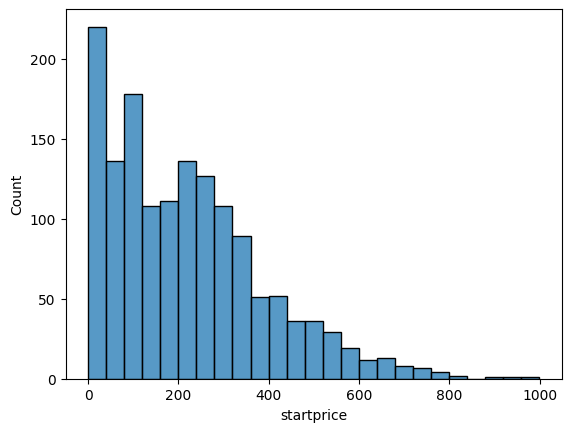

In [30]:
sns.histplot(data['startprice'])

In [31]:
data[data['startprice'] > 655.0]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
468,0,699.95,NaN,Midnight Black,Galaxy_Note8,no description,83,3,0
505,0,785.00,Sprint/T-Mobile,Gold,Galaxy_Note10,contains description,0,0,0
617,1,800.00,NaN,Gold,Galaxy_Note10,contains description,0,0,0
703,0,795.99,AT&T,Space Gray,Galaxy_Note10,contains description,0,0,0
714,0,660.00,NaN,White,Galaxy_Note10,contains description,0,0,0
730,0,675.00,NaN,White,Galaxy_Note10,contains description,0,0,1
742,0,829.99,NaN,Gold,Galaxy_Note10,contains description,0,0,0
766,0,900.00,NaN,Space Gray,Galaxy_Note10,contains description,0,0,0
791,0,720.12,AT&T,Midnight Black,Galaxy_S8,contains description,0,0,0
801,0,699.00,NaN,Space Gray,Galaxy_Note10,no description,12,0,0


In [32]:
meanbyproduct = data.groupby('productline')['startprice'].describe()
meanbyproduct

,count,mean,std,min,25%,50%,75%,max
productline,,,,,,,,
Galaxy_Note10,351.0,366.931311,198.259953,0.99,250.0000,380.000,499.9700,939.00
Galaxy_Note8,153.0,176.065033,122.104147,0.01,99.0000,187.500,239.8800,699.95
Galaxy_Note9,107.0,254.561402,126.208902,0.01,177.5000,259.950,349.9900,575.00
Galaxy_S10,8.0,294.583750,79.754787,160.00,246.2500,301.335,341.7500,420.00
Galaxy_S7,227.0,84.190000,66.527227,0.01,48.7450,79.000,104.9900,499.00
Galaxy_S8,277.0,165.883321,123.743959,0.01,89.9900,155.000,230.0000,999.00
Galaxy_S9,158.0,231.268101,136.186507,0.01,145.8700,249.970,300.0000,695.00
Unknown,204.0,171.994265,156.092171,0.99,44.9975,149.990,259.9925,700.00


In [33]:
meanbyproduct.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [34]:
meanbyproduct['maxpirce'] = meanbyproduct.apply(lambda x: x['75%'] + (1.5*(x['75%'] - x['25%'])), axis=1)
meanbyproduct

# x의 가로방향으로 들어온다. (세로방향 X)

,count,mean,std,min,25%,50%,75%,max,maxpirce
productline,,,,,,,,,
Galaxy_Note10,351.0,366.931311,198.259953,0.99,250.0000,380.000,499.9700,939.00,874.9250
Galaxy_Note8,153.0,176.065033,122.104147,0.01,99.0000,187.500,239.8800,699.95,451.2000
Galaxy_Note9,107.0,254.561402,126.208902,0.01,177.5000,259.950,349.9900,575.00,608.7250
Galaxy_S10,8.0,294.583750,79.754787,160.00,246.2500,301.335,341.7500,420.00,485.0000
Galaxy_S7,227.0,84.190000,66.527227,0.01,48.7450,79.000,104.9900,499.00,189.3575
Galaxy_S8,277.0,165.883321,123.743959,0.01,89.9900,155.000,230.0000,999.00,440.0150
Galaxy_S9,158.0,231.268101,136.186507,0.01,145.8700,249.970,300.0000,695.00,531.1950
Unknown,204.0,171.994265,156.092171,0.99,44.9975,149.990,259.9925,700.00,582.4850


iterrows는 pandas 라이브러리에서 데이터프레임의 각 행을 반복(iterate)하면서 처리할 수 있도록 하는 메서드입니다. 이 메서드는 각 행을 튜플 형태로 반환하며, 첫 번째 요소는 행의 인덱스(index)이고, 두 번째 요소는 시리즈(Series)로서 해당 행의 데이터입니다.

In [35]:
for index, item in meanbyproduct[['maxpirce']].iterrows():
    print(index, item.values[0])
    display(data[(data['productline'] == index) & (data['startprice'] > item.values[0])])
    

Galaxy_Note10 874.9250000000001


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
766,0,900.0,NaN,Space Gray,Galaxy_Note10,contains description,0,0,0
1002,0,939.0,NaN,Gold,Galaxy_Note10,contains description,0,0,0


Galaxy_Note8 451.2


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
468,0,699.95,NaN,Midnight Black,Galaxy_Note8,no description,83,3,0
701,0,463.26,AT&T,White,Galaxy_Note8,no description,99,2,0
901,0,600.00,AT&T,Midnight Black,Galaxy_Note8,no description,30,1,0
938,0,649.99,NaN,Midnight Black,Galaxy_Note8,contains description,0,0,0


Galaxy_Note9 608.725


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold


Galaxy_S10 485.0


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold


Galaxy_S7 189.35749999999996


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
36,0,289.95,NaN,Midnight Black,Galaxy_S7,contains description,0,0,0
50,0,269.99,NaN,Midnight Black,Galaxy_S7,contains description,0,0,0
86,0,279.95,NaN,Midnight Black,Galaxy_S7,contains description,0,0,0
139,0,279.95,NaN,Midnight Black,Galaxy_S7,contains description,0,0,0
205,1,229.97,AT&T,Midnight Black,Galaxy_S7,contains description,0,0,0
363,0,229.99,Verizon,Space Gray,Galaxy_S7,contains description,0,0,1
460,0,198.00,Verizon,White,Galaxy_S7,no description,99,4,0
669,0,200.00,NaN,Midnight Black,Galaxy_S7,contains description,0,0,0
750,1,499.00,NaN,Midnight Black,Galaxy_S7,contains description,0,0,0
774,0,227.00,AT&T,White,Galaxy_S7,no description,98,2,0


Galaxy_S8 440.015


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
207,0,499.99,AT&T,Space Gray,Galaxy_S8,contains description,0,0,0
791,0,720.12,AT&T,Midnight Black,Galaxy_S8,contains description,0,0,0
1102,0,999.00,NaN,Midnight Black,Galaxy_S8,contains description,0,0,0


Galaxy_S9 531.1949999999999


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
660,0,649.99,Verizon,Midnight Black,Galaxy_S9,contains description,0,0,0
1005,0,544.49,NaN,Midnight Black,Galaxy_S9,no description,90,5,0
1015,0,540.00,Verizon,White,Galaxy_S9,no description,36,22,0
1084,0,573.74,NaN,White,Galaxy_S9,contains description,0,0,0
1116,0,695.00,AT&T,White,Galaxy_S9,contains description,0,0,0


Unknown 582.485


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1069,0,595.00,NaN,White,Unknown,contains description,0,0,1
1121,1,700.00,NaN,White,Unknown,contains description,0,0,0
1125,0,700.00,NaN,White,Unknown,contains description,0,0,0
1127,0,599.00,NaN,White,Unknown,contains description,0,0,0
1175,1,599.99,NaN,White,Unknown,contains description,0,0,0
1349,0,590.00,NaN,White,Unknown,contains description,0,0,1


In [36]:
meanbyproduct['maxpirce'].index

Index(['Galaxy_Note10', 'Galaxy_Note8', 'Galaxy_Note9', 'Galaxy_S10',
       'Galaxy_S7', 'Galaxy_S8', 'Galaxy_S9', 'Unknown'],
      dtype='object', name='productline')

In [37]:
for idx, item in zip(meanbyproduct['maxpirce'].index, meanbyproduct['maxpirce']):
    print(idx)
    print(item)
    display(data[(data['productline'] == idx) & (data['startprice'] > item)])

Galaxy_Note10
874.9250000000001


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
766,0,900.0,NaN,Space Gray,Galaxy_Note10,contains description,0,0,0
1002,0,939.0,NaN,Gold,Galaxy_Note10,contains description,0,0,0


Galaxy_Note8
451.2


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
468,0,699.95,NaN,Midnight Black,Galaxy_Note8,no description,83,3,0
701,0,463.26,AT&T,White,Galaxy_Note8,no description,99,2,0
901,0,600.00,AT&T,Midnight Black,Galaxy_Note8,no description,30,1,0
938,0,649.99,NaN,Midnight Black,Galaxy_Note8,contains description,0,0,0


Galaxy_Note9
608.725


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold


Galaxy_S10
485.0


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold


Galaxy_S7
189.35749999999996


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
36,0,289.95,NaN,Midnight Black,Galaxy_S7,contains description,0,0,0
50,0,269.99,NaN,Midnight Black,Galaxy_S7,contains description,0,0,0
86,0,279.95,NaN,Midnight Black,Galaxy_S7,contains description,0,0,0
139,0,279.95,NaN,Midnight Black,Galaxy_S7,contains description,0,0,0
205,1,229.97,AT&T,Midnight Black,Galaxy_S7,contains description,0,0,0
363,0,229.99,Verizon,Space Gray,Galaxy_S7,contains description,0,0,1
460,0,198.00,Verizon,White,Galaxy_S7,no description,99,4,0
669,0,200.00,NaN,Midnight Black,Galaxy_S7,contains description,0,0,0
750,1,499.00,NaN,Midnight Black,Galaxy_S7,contains description,0,0,0
774,0,227.00,AT&T,White,Galaxy_S7,no description,98,2,0


Galaxy_S8
440.015


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
207,0,499.99,AT&T,Space Gray,Galaxy_S8,contains description,0,0,0
791,0,720.12,AT&T,Midnight Black,Galaxy_S8,contains description,0,0,0
1102,0,999.00,NaN,Midnight Black,Galaxy_S8,contains description,0,0,0


Galaxy_S9
531.1949999999999


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
660,0,649.99,Verizon,Midnight Black,Galaxy_S9,contains description,0,0,0
1005,0,544.49,NaN,Midnight Black,Galaxy_S9,no description,90,5,0
1015,0,540.00,Verizon,White,Galaxy_S9,no description,36,22,0
1084,0,573.74,NaN,White,Galaxy_S9,contains description,0,0,0
1116,0,695.00,AT&T,White,Galaxy_S9,contains description,0,0,0


Unknown
582.485


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1069,0,595.00,NaN,White,Unknown,contains description,0,0,1
1121,1,700.00,NaN,White,Unknown,contains description,0,0,0
1125,0,700.00,NaN,White,Unknown,contains description,0,0,0
1127,0,599.00,NaN,White,Unknown,contains description,0,0,0
1175,1,599.99,NaN,White,Unknown,contains description,0,0,0
1349,0,590.00,NaN,White,Unknown,contains description,0,0,1


In [38]:
data['color'].value_counts()

color
Midnight Black    539
White             537
Space Gray        299
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

<Axes: xlabel='color'>

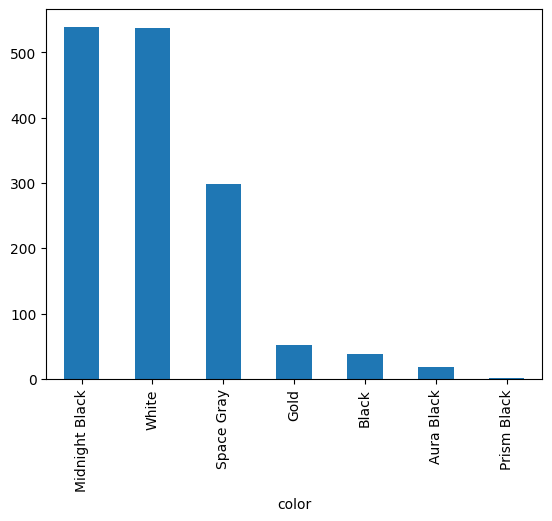

In [39]:
data['color'].value_counts().plot(kind='bar')

In [40]:
data.groupby('color')['sold'].value_counts(sort=False)

color           sold
Aura Black      0        13
                1         6
Black           0        22
                1        16
Gold            0        34
                1        18
Midnight Black  0       257
                1       282
Prism Black     0         1
Space Gray      0       165
                1       134
White           0       307
                1       230
Name: count, dtype: int64

컬러는 구매에 큰 영향이 없다.

In [41]:
data['productline'].value_counts()

productline
Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: count, dtype: int64

<Axes: xlabel='productline'>

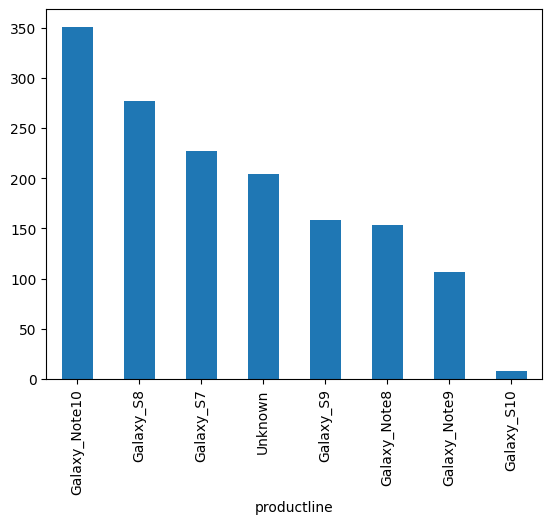

In [42]:
data['productline'].value_counts().plot(kind='bar')

In [43]:
data.groupby('productline')['sold'].value_counts(sort=False)

productline    sold
Galaxy_Note10  0       202
               1       149
Galaxy_Note8   0        73
               1        80
Galaxy_Note9   0        58
               1        49
Galaxy_S10     0         4
               1         4
Galaxy_S7      0       102
               1       125
Galaxy_S8      0       145
               1       132
Galaxy_S9      0        93
               1        65
Unknown        0       122
               1        82
Name: count, dtype: int64

기종에 따라서 판매량이 크게 달라지지 않는다.

In [44]:
data['noDescription'].value_counts()

noDescription
contains description    856
no description          629
Name: count, dtype: int64

In [45]:
def reverse_value(x):
    if x == 'contains description':
        return 'no description'
    elif x == 'no description':
        return 'contains description'
    
# 원데이터가 잘못되었기 때문에 다시 정상적으로 바꿔주는 작업

In [46]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,White,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,White,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1


In [47]:
data['noDescription'] = data['noDescription'].apply(reverse_value)
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,no description,0,0,1
1,0,235.00,NaN,White,Galaxy_Note9,no description,0,0,0
2,0,199.99,NaN,White,Unknown,contains description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,no description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,no description,0,0,1


In [48]:
data.groupby('noDescription')['sold'].value_counts()

noDescription         sold
contains description  0       356
                      1       273
no description        0       443
                      1       413
Name: count, dtype: int64

noDescription 도 판매와는 관계가 없다.

<Axes: xlabel='charCountDescription', ylabel='Count'>

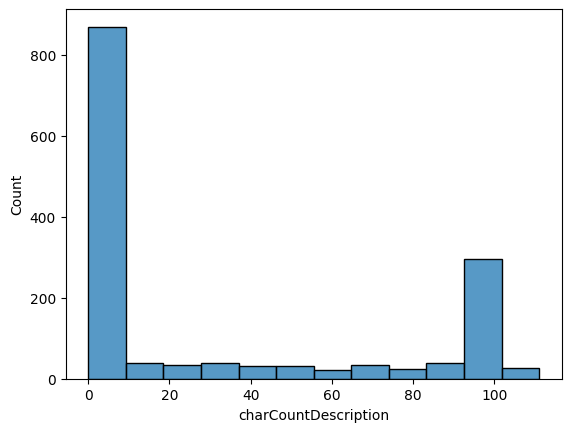

In [49]:
sns.histplot(data['charCountDescription'])

In [50]:
data['charCountDescription'].describe()

count    1485.000000
mean       31.184512
std        41.744518
min         0.000000
25%         0.000000
50%         0.000000
75%        79.000000
max       111.000000
Name: charCountDescription, dtype: float64

In [51]:
data[data['charCountDescription'] > 0]['sold'].value_counts()

sold
0    356
1    273
Name: count, dtype: int64

charCountDescription 의 글자수도 판매와는 관련이 없다.

<Axes: xlabel='upperCaseDescription', ylabel='Count'>

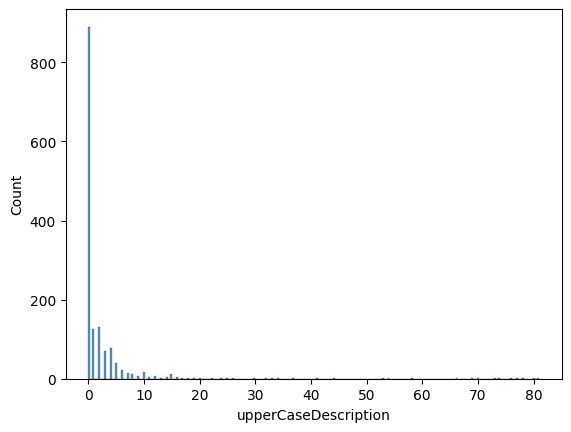

In [52]:
sns.histplot(data['upperCaseDescription'])

# 강조글 적은 거 0 이 제일 많다. 

In [53]:
data[data['upperCaseDescription'] > 0]['sold'].value_counts()

sold
0    343
1    252
Name: count, dtype: int64

upperCaseDescription 판매에 영향이 없다.

In [54]:
data['BuyItNow'].value_counts()

BuyItNow
0    818
1    667
Name: count, dtype: int64

In [55]:
data.groupby('BuyItNow')['sold'].value_counts(sort=False)

BuyItNow  sold
0         0       639
          1       179
1         0       160
          1       507
Name: count, dtype: int64

In [56]:
print("BuyItNow0일때", 179 / (179+639))
print("BuyItNow1일때", 507 / (507+160))

BuyItNow0일때 0.21882640586797067
BuyItNow1일때 0.760119940029985


BuyItNow 가 1일 때 판매량이 높다.

* 1번줄 : 즉시구매하지 않겠다 - 고민하느라 아직 안삼 --> 구매욕 가장 낮은 사람들
* 2번줄 : 즉시구매하지 않겠다 - 바로 구매한 사람들 --> 왜 안사려다 바로 산걸까?
* 3번줄 : 즉시구매하겠다 - 바로 구매하지 않은 사람들 --> 왜 갑자기 구매를 망설여? 혹시 후기가 안좋나?
* 4번줄 : 즉시구매하겠다 - 바로 구매함 --> 구매욕 가장 높은 사람들

# Feature Engineering

In [57]:
data.head(2)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,no description,0,0,1
1,0,235.00,NaN,White,Galaxy_Note9,no description,0,0,0


carrier, noDescription	charCountDescription	upperCaseDescription 는 삭제

In [58]:
data = data.drop(['carrier', 'noDescription', 'charCountDescription', 'upperCaseDescription'], axis=1)

In [59]:
data.head()

,BuyItNow,startprice,color,productline,sold
0,0,199.99,White,Galaxy_S9,1
1,0,235.00,White,Galaxy_Note9,0
2,0,199.99,White,Unknown,0
3,1,175.00,Space Gray,Galaxy_Note9,1
4,1,100.00,Space Gray,Galaxy_S8,1


In [60]:
data = pd.get_dummies(data, drop_first=True)
# drop_first로 컬럼의 개수를 한개씩 줄인다. 
data.head()

,BuyItNow,startprice,sold,color_Black,color_Gold,color_Midnight Black,color_Prism Black,color_Space Gray,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown
0,0,199.99,1,False,False,False,False,False,True,False,False,False,False,False,True,False
1,0,235.00,0,False,False,False,False,False,True,False,True,False,False,False,False,False
2,0,199.99,0,False,False,False,False,False,True,False,False,False,False,False,False,True
3,1,175.00,1,False,False,False,False,True,False,False,True,False,False,False,False,False
4,1,100.00,1,False,False,False,False,True,False,False,False,False,False,True,False,False


# 데이터 분리 및 분석

일반적으로 데이터 분석 및 머신러닝에서 X와 y는 각각 독립 변수와 종속 변수를 나타낸다. X는 대문자로 사용하는 것이 관례다. 그 이유는 X가 다차원 배열(즉, 여러 개의 특징(feature)으로 이루어진 데이터)을 나타내는 반면, y는 종속 변수로, 보통 1차원 배열(즉, 레이블 또는 타겟)을 나타내기 때문이다. <br><br>

이 코드는 데이터를 독립 변수 X와 종속 변수 y로 분리합니다.

X: 원본 데이터프레임 data에서 'sold' 열을 제외한 모든 열을 포함합니다. 즉, 모델의 입력(feature)으로 사용할 데이터를 가집니다.<br><br>
y: 원본 데이터프레임 data의 'sold' 열입니다. 즉, 예측하려고 하는 타겟 변수입니다.
X를 대문자로 사용하는 이유는 관례적으로 다차원 데이터(여러 특징을 포함한 데이터)를 나타내기 때문입니다. 이와 달리, y는 종속 변수로 보통 1차원 배열을 나타내므로 소문자로 표기하는 것이 일반적입니다.

In [61]:
X = data.drop('sold', axis=1)
y = data['sold']

# 무조건 X 는 대문자 

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [65]:
dtc = DecisionTreeClassifier(max_depth= 9, random_state=7)


dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)


print("accuracy_score", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

accuracy_score 0.797979797979798
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       158
           1       0.81      0.75      0.78       139

    accuracy                           0.80       297
   macro avg       0.80      0.79      0.80       297
weighted avg       0.80      0.80      0.80       297



In [66]:
for i in range(1, 30):
    dtc = DecisionTreeClassifier(max_depth= i, random_state=7)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, "accuracy_score", accuracy_score(y_test, pred))
    print(i, classification_report(y_test, pred))

1 accuracy_score 0.7811447811447811
1               precision    recall  f1-score   support

           0       0.80      0.79      0.79       158
           1       0.76      0.77      0.77       139

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297

2 accuracy_score 0.7811447811447811
2               precision    recall  f1-score   support

           0       0.80      0.79      0.79       158
           1       0.76      0.77      0.77       139

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297

3 accuracy_score 0.7777777777777778
3               precision    recall  f1-score   support

           0       0.74      0.90      0.81       158
           1       0.85      0.64      0.73       139

    accuracy                           0.78       297
   macro avg  

### 결론 : max_depth = 9 일때, 가장 높은 정확도 accuracy_score 0.7912457912457912   
79% 가 나옴. 

In [67]:
dtc = DecisionTreeClassifier(max_depth= 9, random_state=7)


dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)

print("accuracy_score", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

accuracy_score 0.797979797979798
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       158
           1       0.81      0.75      0.78       139

    accuracy                           0.80       297
   macro avg       0.80      0.79      0.80       297
weighted avg       0.80      0.80      0.80       297



# 성능 평가 및 성능 개선을 위한 튜닝

섣불리 칼럼을 막 정리하고, 삭제하는게 정확도를 높이진 않음. 

# ---------------------------------------------------------------------

각 기종별 평균 startprice 보다 저렴할 경우의 판매량, 비쌀 경우의 판매량

예제 : data3에 pricebyproduct2에 있는 기종별 평균 가격 추가 / [meanprice] => 평균가격 <br>


In [68]:
data2 = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv")
data2.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1


In [69]:
data3 = data2.copy()

In [70]:
pricebyproduct2 = data3.groupby('productline')['startprice'].describe()
pricebyproduct2

,count,mean,std,min,25%,50%,75%,max
productline,,,,,,,,
Galaxy_Note10,351.0,366.931311,198.259953,0.99,250.0000,380.000,499.9700,939.00
Galaxy_Note8,153.0,176.065033,122.104147,0.01,99.0000,187.500,239.8800,699.95
Galaxy_Note9,107.0,254.561402,126.208902,0.01,177.5000,259.950,349.9900,575.00
Galaxy_S10,8.0,294.583750,79.754787,160.00,246.2500,301.335,341.7500,420.00
Galaxy_S7,227.0,84.190000,66.527227,0.01,48.7450,79.000,104.9900,499.00
Galaxy_S8,277.0,165.883321,123.743959,0.01,89.9900,155.000,230.0000,999.00
Galaxy_S9,158.0,231.268101,136.186507,0.01,145.8700,249.970,300.0000,695.00
Unknown,204.0,171.994265,156.092171,0.99,44.9975,149.990,259.9925,700.00


In [71]:
# 평균 가격보다 싼 것

data3[(data3['productline'] == 'Galaxy_Note10') & (data3['startprice'] < 366.931311)]['sold'].value_counts()

sold
1    111
0     53
Name: count, dtype: int64

In [72]:
# 평균 가격보다 비싼 것

data3[(data3['productline'] == 'Galaxy_Note10') & (data3['startprice'] > 366.931311)]['sold'].value_counts()

sold
0    149
1     38
Name: count, dtype: int64

In [73]:
for product, meanprice in zip(pricebyproduct2['mean'].index , pricebyproduct2['mean'].values):
    display(data3[(data3['productline'] == product) & (data3['startprice'] < meanprice)][['productline','sold']].value_counts(sort=False))
    display(data3[(data3['productline'] == product) & (data3['startprice'] > meanprice)][['productline','sold']].value_counts(sort=False))
    print("="*50)

productline    sold
Galaxy_Note10  0        53
               1       111
Name: count, dtype: int64

productline    sold
Galaxy_Note10  0       149
               1        38
Name: count, dtype: int64

productline   sold
Galaxy_Note8  0       11
              1       54
Name: count, dtype: int64

productline   sold
Galaxy_Note8  0       62
              1       26
Name: count, dtype: int64

productline   sold
Galaxy_Note9  0       18
              1       35
Name: count, dtype: int64

productline   sold
Galaxy_Note9  0       40
              1       14
Name: count, dtype: int64

productline  sold
Galaxy_S10   0       1
             1       2
Name: count, dtype: int64

productline  sold
Galaxy_S10   0       3
             1       2
Name: count, dtype: int64

productline  sold
Galaxy_S7    0        22
             1       108
Name: count, dtype: int64

productline  sold
Galaxy_S7    0       80
             1       17
Name: count, dtype: int64

productline  sold
Galaxy_S8    0        38
             1       112
Name: count, dtype: int64

productline  sold
Galaxy_S8    0       107
             1        20
Name: count, dtype: int64

productline  sold
Galaxy_S9    0       15
             1       54
Name: count, dtype: int64

productline  sold
Galaxy_S9    0       78
             1       11
Name: count, dtype: int64

productline  sold
Unknown      0       58
             1       63
Name: count, dtype: int64

productline  sold
Unknown      0       64
             1       19
Name: count, dtype: int64

startprice가 기종별 평균 가격보다 싸야 팔린다.


In [74]:
pricebyproduct2.index

Index(['Galaxy_Note10', 'Galaxy_Note8', 'Galaxy_Note9', 'Galaxy_S10',
       'Galaxy_S7', 'Galaxy_S8', 'Galaxy_S9', 'Unknown'],
      dtype='object', name='productline')

In [75]:
# 함수 한땀한땀 만들기

def meanPrice(product):
    if product == 'Galaxy_Note10':
        return 366.931311
    elif product == 'Galaxy_Note8':
        return 176.065033
    elif product == 'Galaxy_Note9':
        return 254.561402 
    elif product == 'Galaxy_S10':
        return 294.583750
    elif product == 'Galaxy_S7':
        return 84.190000
    elif product == 'Galaxy_S8':
        return 165.883321
    elif product == 'Galaxy_S9':
        return 231.268101
    elif product == 'Unknown':
        return 171.994265
    

In [76]:
data3['meanprice'] = data3['productline'].apply(meanPrice)

In [77]:
data3['meanprice']

0       231.268101
1       254.561402
2       171.994265
3       254.561402
4       165.883321
           ...    
1480     84.190000
1481    231.268101
1482    366.931311
1483     84.190000
1484     84.190000
Name: meanprice, Length: 1485, dtype: float64

In [78]:
data3.head()

# 'meanprice' 칼럼이 추가된 걸 볼 수 있다. 

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold,meanprice
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1,231.268101
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0,254.561402
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0,171.994265
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1,254.561402
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1,165.883321


In [79]:
pricebyproduct2

# 평균가격이 있는 데이터프레임

,count,mean,std,min,25%,50%,75%,max
productline,,,,,,,,
Galaxy_Note10,351.0,366.931311,198.259953,0.99,250.0000,380.000,499.9700,939.00
Galaxy_Note8,153.0,176.065033,122.104147,0.01,99.0000,187.500,239.8800,699.95
Galaxy_Note9,107.0,254.561402,126.208902,0.01,177.5000,259.950,349.9900,575.00
Galaxy_S10,8.0,294.583750,79.754787,160.00,246.2500,301.335,341.7500,420.00
Galaxy_S7,227.0,84.190000,66.527227,0.01,48.7450,79.000,104.9900,499.00
Galaxy_S8,277.0,165.883321,123.743959,0.01,89.9900,155.000,230.0000,999.00
Galaxy_S9,158.0,231.268101,136.186507,0.01,145.8700,249.970,300.0000,695.00
Unknown,204.0,171.994265,156.092171,0.99,44.9975,149.990,259.9925,700.00


In [80]:
pricebyproduct2.loc['Galaxy_Note10', 'mean']

# Galaxy_Note10 의 평균가격만 추출 가능 ~ 

np.float64(366.9313105413105)

In [81]:
pricebyproduct2.index

Index(['Galaxy_Note10', 'Galaxy_Note8', 'Galaxy_Note9', 'Galaxy_S10',
       'Galaxy_S7', 'Galaxy_S8', 'Galaxy_S9', 'Unknown'],
      dtype='object', name='productline')

In [82]:
# 방법 1

for product in pricebyproduct2.index :
    print(pricebyproduct2.loc[ product, 'mean' ])
    
# 각 기종별 평균 가격이 출력됨

366.9313105413105
176.06503267973858
254.56140186915889
294.58375
84.19
165.883321299639
231.2681012658228
171.99426470588236


In [83]:
pricebyproduct2.index

Index(['Galaxy_Note10', 'Galaxy_Note8', 'Galaxy_Note9', 'Galaxy_S10',
       'Galaxy_S7', 'Galaxy_S8', 'Galaxy_S9', 'Unknown'],
      dtype='object', name='productline')

In [84]:
# 방법 2 : loc 로  pricebyproduct2 에서 추출해서 입력하기 
# 각 기종별 평균 가격이 출력됨

# data3['meanprice2'] = data3['productline'].apply(lambda x: pricebyproduct2.loc[x, 'mean'])
# data3.head()

In [85]:
# data3.drop('meanprice2', axis=1, inplace=True)

예제 : startprice 컬럼과 비교해서 isUnderMean 컬럼 추가 => 평균보다 저렴하면 1, 비싸면 0

In [86]:
data3[data3['startprice'] < data3['meanprice']]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold,meanprice
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1,231.268101
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0,254.561402
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1,254.561402
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1,165.883321
5,1,0.99,NaN,White,Galaxy_S7,contains description,0,0,1,84.190000
...,...,...,...,...,...,...,...,...,...,...
1468,1,50.00,NaN,Midnight Black,Galaxy_S7,no description,100,12,1,84.190000
1469,0,249.99,Sprint/T-Mobile,Space Gray,Galaxy_Note10,contains description,0,0,1,366.931311
1472,0,36.95,NaN,NaN,Galaxy_S7,no description,70,10,0,84.190000
1475,1,119.99,NaN,Midnight Black,Galaxy_S8,contains description,0,0,1,165.883321


In [87]:
# 방법 1 

for start, mean in zip(data3['startprice'],  data3['meanprice']):  # apply
    if start < mean:
        print(1)
    else:
        print(0)

1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
0
0
0
0
1
1
0
0
0
1
0
0
1
1
0
0
0
1
1
0
0
0
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
0
1
0
0
0
0
1
0
1
1
1
1
1
1
0
0
1
1
1
0
1
0
0
0
1
0
1
1
0
0
1
1
0
1
0
0
1
1
0
0
0
1
1
0
0
0
1
1
0
0
1
1
1
0
0
0
1
0
1
1
0
0
1
1
1
0
0
1
0
1
0
0
1
1
0
1
1
1
0
1
0
1
1
0
1
1
0
0
1
0
0
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
0
1
0
1
1
1
1
1
1
0
0
0
1
1
1
1
0
1
0
1
1
0
0
0
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
0
1
1
0
1
0
1
0
0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
0
0
0
1
0
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
0
0
1
0
1
1
0
0
1
0
1
0
0
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
0
0
1
0
1
0
0
0
1
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
0
0
0
1
1
0
1
0
0
0
1
0
1
1
1
1
0
1
0
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
0
1
0
1
1
1
1
1
0
0
1
1
0
1
1
0
1
0
0
1
1
0
1
1
1
0
1
1
1
0
0
0
0
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
0
0
0
0
1
0
1
0
0
1
1
1
0
0
1
1
1
0
0
1
0
1
0
1
1
1
0
0
0
1
1
1
1


In [88]:
# 방법 2 

data3['isUnderMean'] = data3.apply(lambda x : 1 if x['startprice'] < x['meanprice'] else 0, axis = 1)
data3.head()



,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold,meanprice,isUnderMean
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1,231.268101,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0,254.561402,1
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0,171.994265,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1,254.561402,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1,165.883321,1


In [89]:
data3 = data3[['BuyItNow', 'startprice', 'color', 'productline', 'noDescription', 'sold', 'isUnderMean']]

In [90]:
data3 = pd.get_dummies(data3)

In [91]:
data3

,BuyItNow,startprice,sold,isUnderMean,color_Aura Black,color_Black,color_Gold,color_Midnight Black,color_Prism Black,color_Space Gray,...,productline_Galaxy_Note10,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_contains description,noDescription_no description
0,0,199.99,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,235.00,0,1,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,0,199.99,0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,1,175.00,1,1,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
4,1,100.00,1,1,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,0,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1481,0,239.95,1,0,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1482,0,329.99,0,1,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1483,0,89.00,1,0,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [92]:
X3 = data3.drop('sold', axis=1)
y3 = data3['sold']

In [93]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=7)

In [94]:
dtc3 = DecisionTreeClassifier(max_depth=2, random_state=7)
dtc3.fit(X3_train, y3_train)
pred3 = dtc3.predict(X3_test)


print(accuracy_score(y3_test, pred3))
print(classification_report(y3_test, pred3))


# max_depth = 2 정확도가 0.81 이 제일 높다. 


0.8114478114478114
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       158
           1       0.87      0.70      0.78       139

    accuracy                           0.81       297
   macro avg       0.82      0.80      0.81       297
weighted avg       0.82      0.81      0.81       297



In [95]:
for i in range(1,30):
    dtc3 = DecisionTreeClassifier(max_depth=i, random_state=7)
    dtc3.fit(X3_train, y3_train)
    pred3 = dtc3.predict(X3_test)
    print(i, accuracy_score(y3_test, pred3))
    print(i, classification_report(y3_test, pred3))
    
    
    
# max_depth = 2 정확도가 0.81 이 제일 높다. 

1 0.7811447811447811
1               precision    recall  f1-score   support

           0       0.80      0.79      0.79       158
           1       0.76      0.77      0.77       139

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297

2 0.8114478114478114
2               precision    recall  f1-score   support

           0       0.77      0.91      0.84       158
           1       0.87      0.70      0.78       139

    accuracy                           0.81       297
   macro avg       0.82      0.80      0.81       297
weighted avg       0.82      0.81      0.81       297

3 0.7946127946127947
3               precision    recall  f1-score   support

           0       0.78      0.85      0.81       158
           1       0.81      0.73      0.77       139

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weigh

# ------------------------------------------------------------------------

# * ydata profiling 
* 파이썬 사용할 때 데이터 시각화를 통해 분석할 수 있는 패키지다. 
* 판다스와 ydata profiling 패키지를 모두 불러온 뒤 사용할 수 있다. 

참고  : https://github.com/ydataai/ydata-profiling    <br>
설명  : https://post.naver.com/viewer/postView.nhn?volumeNo=36354809&memberNo=412918&isInf=true

In [96]:
# ydata profiling 설치하기

#!pip install ydata-profiling

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     --------------------------- ------------ 41.0/60.6 kB 1.9 MB/s eta 0:00:01
     ---------------------------------------- 60.6/60.6 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/125.2 kB ? eta -:--:--
     ---------------------------------------- 125.2/125.2 kB ? eta 0:00:00
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/356.2 kB ? eta -:--:--
   ---------------------------------------- 356.2/356.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
   ----------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [98]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv")

In [97]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [99]:
profile = ProfileReport(data, title="Profiling Report")
profile.to_file("samsung_ebay.html")


# ydata profiling 결과 파일로 보내기 
# 출력결과는 별도 생성된 html 파일 열어야 확인 가능함. 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

이 주피터 저장된 폴더에 가면 'samsung_ebay.html' 파일이 있다. 클릭해서 보면 데이터 시각화 및 분석이 가능하다. 